[ProgrammingComputerVision(P.52)](http://programmingcomputervision.com/downloads/ProgrammingComputerVision_CCdraft.pdf)  
[데이터 사이언스 스쿨](https://datascienceschool.net/view-notebook/9db1c9a006d747478e6cb4069a567d85/)  
[OpenCV](http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html)  
[OpenCV를 이용한 Python SIFT, SURF](http://elecs.tistory.com/159)  
[크기불변 이미지 특성 검출 기법 SIFT](https://m.blog.naver.com/PostView.nhn?blogId=samsjang&logNo=220643446825&proxyReferer=https%3A%2F%2Fwww.google.com%2F)  
[SIFT(Scale Invariant Feature Transform)의 원리](http://bskyvision.com/21)  
[Scale-Invariant-Feature Transform(SIFT)-최성필](https://salkuma.files.wordpress.com/2014/04/sifteca095eba6ac.pdf)  
[파이썬으로 이미지 검색기 만들기 SIFT로 특징점 추출하기](http://imloil.blogspot.com/2017/06/2-sift.html)  
아래 내용은 위의 링크를 정리한것.

# SIFT(Scale-Invariant Feature Transfrom)

SIFT를 간단하게 말하자면 특징점의 크기와 각도까지 같이 개산하여 이미지의 크기가 변하거나 회전해도 동일한 특징점을 찾을 수 있게 만드는 방법이다.

또한 특징점 근처의 이미지 특성(히스토그램)도 같이 개산하여 특징점 이미지의 모양도 구별 할 수 있도록 한다.

In [8]:
from PIL import Image
import os

## sift 
def process_image(imagename,resultname,params="--edge-thresh 10 --peak-thresh 5"):
    """ Process an image and save the results in a file. """
    if imagename[-3:] != 'pgm':
        # create a pgm file
#         im = Image.open(imagename).convert('L')
        im = Image.open(imagename).convert('L')
        im.save('tmp.pgm')
        imagename = 'tmp.pgm'
    cmmd = str("sift"+imagename+"--output="+resultname+" "+params)
    print (cmmd)
    os.system(cmmd)
    print ('processed', imagename, 'to', resultname)

In [9]:
def read_features_from_file(filename):
    """ Read feature properties and return in matrix form. """
    f = loadtxt(filename)
    return f[:,:4],f[:,4:] # feature locations, descriptors

In [10]:
def write_features_to_file(filename,locs,desc):
    """ Save feature location and descriptor to file. """
    savetxt(filename,hstack((locs,desc)))

In [11]:
def plot_features(im,locs,circle=False):
    """ Show image with features. input: im (image as array),
    locs (row, col, scale, orientation of each feature). """
    def draw_circle(c,r):
        t = arange(0,1.01,.01)*2*pi
        x = r*cos(t) + c[0]
        y = r*sin(t) + c[1]
        plot(x,y,'b',linewidth=2)
    imshow(im)
    if circle:
        for p in locs:
            draw_circle(p[:2],p[2])
        else:
            plot(locs[:,0],locs[:,1],'ob')
        axis('off')

In [14]:
# import sift
imname = 'empire.jpg'
im1 = Image.open(imname).convert('L')
# im1 = array(Image.open(imname).convert('L'))
process_image(imname,'empire.sift')
l1,d1 = read_features_from_file('temp.sift')
figure()
gray()
plot_features(im1,l1,circle=True)
show()

sifttmp.pgm--output=empire.sift --edge-thresh 10 --peak-thresh 5
processed tmp.pgm to empire.sift


NameError: name 'loadtxt' is not defined

본문에서 설명하는 이미지를 SIFT 변환하는 과정에서 vector로 text를 만드는 것에 문제가 있다.  
(Python 3.6을 사용)

그래서 Open CV를 이용한다.

[[ 44  44  47 ..., 127 126 129]
 [ 43  46  45 ..., 127 127 128]
 [ 44  47  44 ..., 128 128 128]
 ..., 
 [ 25  21  21 ...,  57  55  49]
 [ 21  26  26 ...,  63  61  54]
 [ 27  25  24 ...,  50  51  59]]
[[21 18 25 ..., 13 14 18]
 [22 20 18 ..., 16 15 14]
 [18 20 12 ..., 16 15 14]
 ..., 
 [17 17 18 ..., 19 21 13]
 [18 19 14 ..., 19 18 18]
 [17 16 18 ..., 19 18 18]]


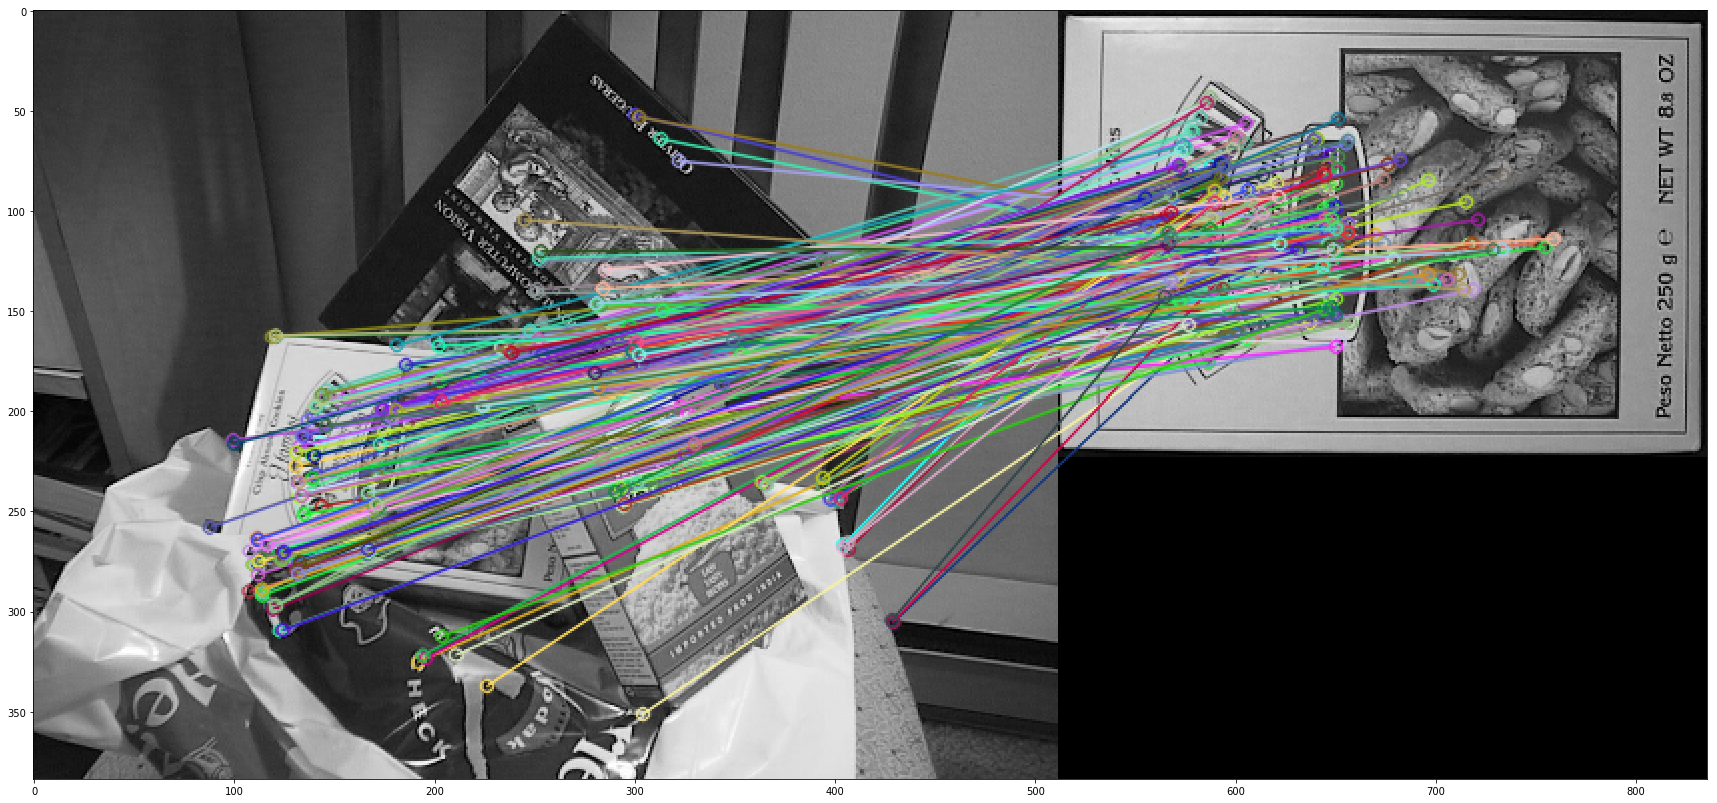

(<matplotlib.image.AxesImage at 0x29be9ae8b70>, None)

In [53]:
import numpy as np
import cv2
from matplotlib import pyplot as plt 

img1 = cv2.imread('scene.pgm',0)          # queryImage
img2 = cv2.imread('box.pgm',0) # trainImage
print(img1)
print(img2)
  # Initiate ORB detector
orb = cv2.ORB_create()

  # find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

  # create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

 # Match descriptors.
matches = bf.match(des1,des2)

 # Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

 # Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches ,None, flags=2)

plt.figure(figsize = (30, 30))
plt.imshow(img3),plt.show()

[[ 44  44  47 ..., 127 126 129]
 [ 43  46  45 ..., 127 127 128]
 [ 44  47  44 ..., 128 128 128]
 ..., 
 [ 25  21  21 ...,  57  55  49]
 [ 21  26  26 ...,  63  61  54]
 [ 27  25  24 ...,  50  51  59]]
[[30 32 31 ..., 19 20 17]
 [29 31 29 ..., 24 15 21]
 [25 34 28 ..., 16 20 21]
 ..., 
 [29 24 32 ..., 29 34 26]
 [28 29 30 ..., 17 16 17]
 [30 28 31 ..., 18 14 21]]


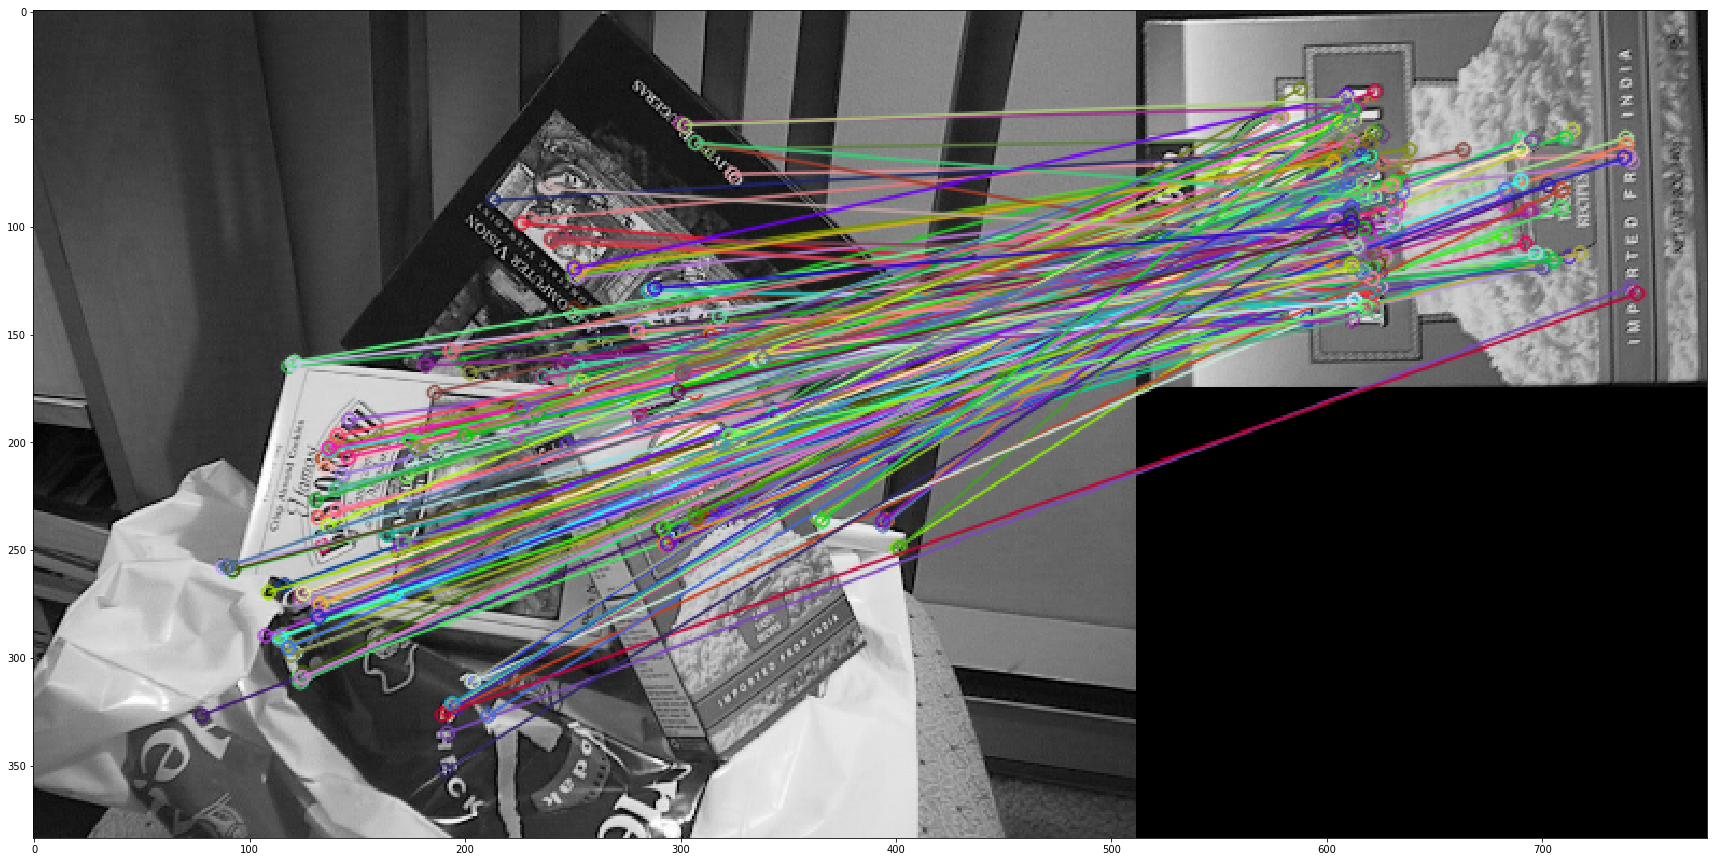

(<matplotlib.image.AxesImage at 0x29be9a83cf8>, None)

In [52]:
import numpy as np
import cv2
from matplotlib import pyplot as plt 

img1 = cv2.imread('scene.pgm',0)          # queryImage
img2 = cv2.imread('basmati.pgm',0) # trainImage
print(img1)
print(img2)
  # Initiate ORB detector
orb = cv2.ORB_create()

  # find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

  # create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

 # Match descriptors.
matches = bf.match(des1,des2)

 # Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

 # Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches ,None, flags=2)

plt.figure(figsize = (30, 30))
plt.imshow(img3),plt.show()

[[ 44  44  47 ..., 127 126 129]
 [ 43  46  45 ..., 127 127 128]
 [ 44  47  44 ..., 128 128 128]
 ..., 
 [ 25  21  21 ...,  57  55  49]
 [ 21  26  26 ...,  63  61  54]
 [ 27  25  24 ...,  50  51  59]]
[[26 25 24 ..., 11 11  9]
 [34 39 21 ..., 12 10 11]
 [35 49 58 ..., 12 11 12]
 ..., 
 [31 27 28 ..., 14 15 14]
 [18 18 24 ..., 15 16 20]
 [16 15 15 ..., 15 15 22]]


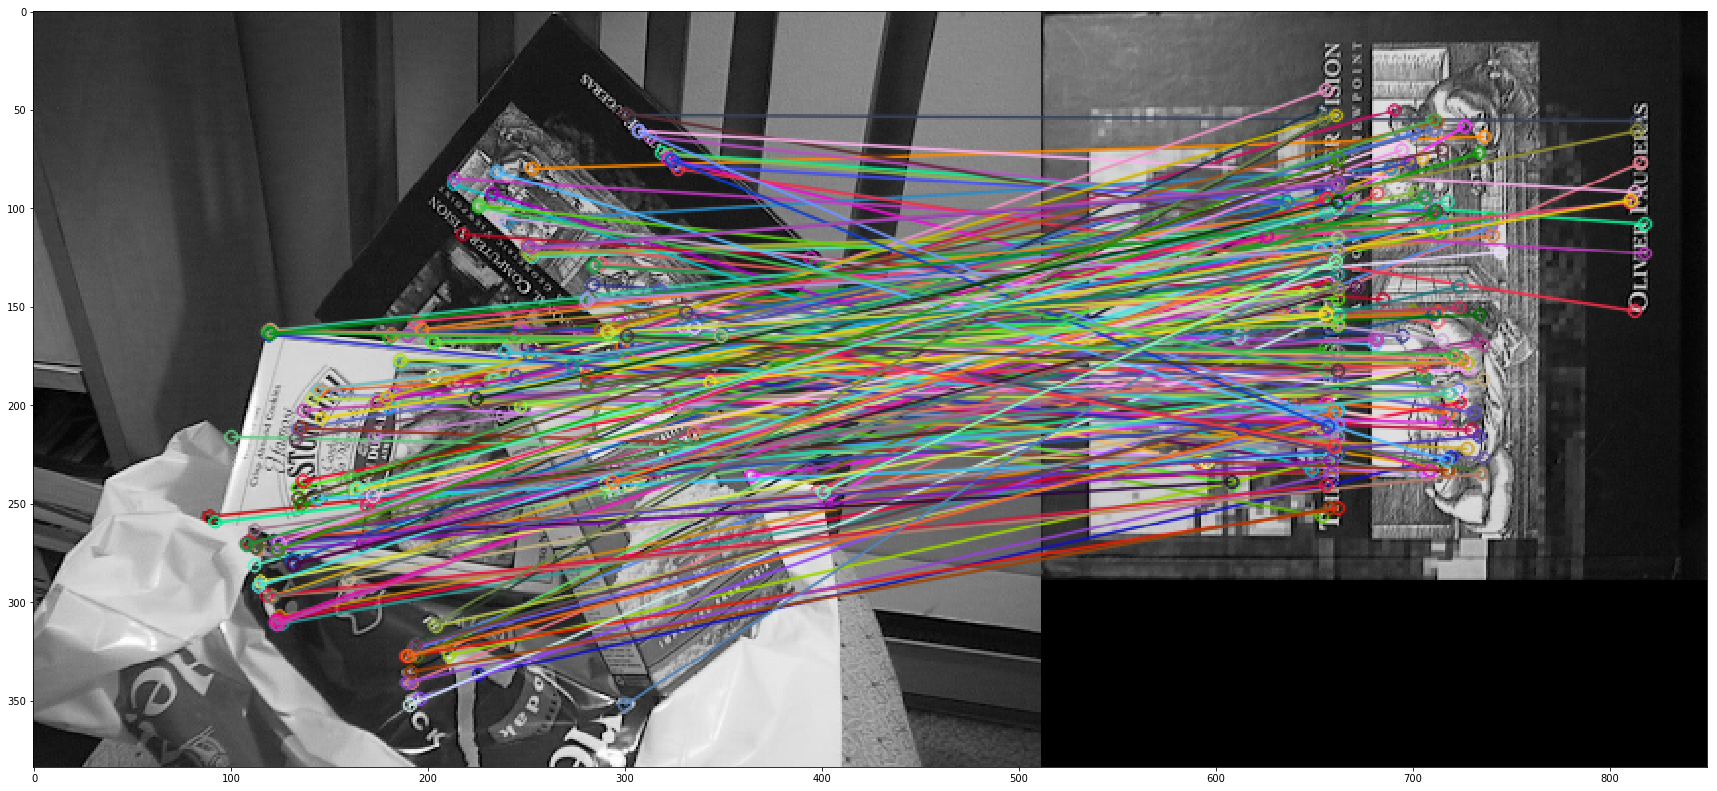

(<matplotlib.image.AxesImage at 0x29be94dbb70>, None)

In [51]:
import numpy as np
import cv2
from matplotlib import pyplot as plt 

img1 = cv2.imread('scene.pgm',0)          # queryImage
img2 = cv2.imread('book.pgm',0) # trainImage
print(img1)
print(img2)
  # Initiate ORB detector
orb = cv2.ORB_create()

  # find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

  # create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

 # Match descriptors.
matches = bf.match(des1,des2)

 # Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

 # Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches ,None, flags=2)

plt.figure(figsize = (30, 30))
plt.imshow(img3),plt.show()

특징점을 어느 정도 찾아가는 모습을 보이고 있다.  
이론에 대해서는 차후에 정리한다.